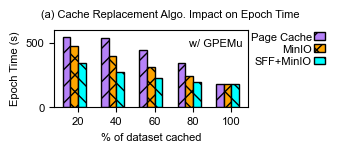

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams["font.family"] = "Arial"

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8

fig = plt.gcf()

columns = ['cache', 'pytorch', 'minio', 'sff']

# ssd, 24 workers, 8 v100
df = pd.read_csv('data.csv', sep='\t', header=None, names=columns)

num_subcategories = 3
pytorch_values = df['pytorch'].tolist()
minio_values = df['minio'].tolist()
sff_values = df['sff'].tolist()
caches = df['cache'].tolist()
categories = caches

bar_width = 0.2
index = np.arange(len(categories))

# Plotting the bar chart
plt.bar(index, pytorch_values, bar_width, label='Page Cache', color='#B682F8', hatch="//", edgecolor="black")
plt.bar(index + 1 * bar_width, minio_values, bar_width, label='MinIO', color='orange', hatch="xx", edgecolor="black")
plt.bar(index + 2 * bar_width, sff_values, bar_width, label='SFF+MinIO', color='cyan', hatch="\\\\", edgecolor="black")


plt.ylim(0,600)
# Adding labels and title
plt.xticks(index + (bar_width * num_subcategories) / 2, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('% of dataset cached', fontsize=fontsize)
plt.ylabel('Epoch Time (s)', fontsize=fontsize)
plt.title('(a) Cache Replacement Algo. Impact on Epoch Time',fontsize=fontsize, pad=9, x=0.6)
plt.annotate("w/ GPEMu", xy=(2, 400), xytext=(3.2, 470),fontsize=fontsize)


fig.set_size_inches(2.5, 1)
fig.set_dpi(100)
plt.legend(fontsize=fontsize,  markerfirst=False, frameon=False, bbox_to_anchor=(1.45, 1.1), labelspacing=0.2, handletextpad=0.2, handlelength=1, loc="upper right")
plt.savefig('epoch.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()
